In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-31 18:48:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.80MB/s    in 48s     

2020-07-31 18:49:47 (6.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
pip install split_folders

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile
import os
import split_folders

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
split_folders.ratio (base_dir, output='/tmp/rockpaperscissors', seed=1337, ratio=(.6,.4))

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 2420.07 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors/train')

['scissors', 'rock', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/val')

['scissors', 'rock', 'paper']

In [ ]:
rock = os.path.join(base_dir, 'rock')
paper = os.path.join(base_dir, 'paper')
scissors = os.path.join(base_dir, 'scissors')

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors), test_size=0.4)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,  
                                   horizontal_flip=True, 
                                   shear_range=0.2, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=20, 
                                  horizontal_flip=True, 
                                  shear_range=0.2, 
                                  fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150,150), 
                                                        batch_size=32, 
                                                        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator, 
          steps_per_epoch=31, 
          epochs=30, 
          validation_data=validation_generator, 
          validation_steps=5, 
          verbose=2)

Epoch 1/30
31/31 - 9s - loss: 0.0973 - accuracy: 0.9607 - val_loss: 0.1493 - val_accuracy: 0.9563
Epoch 2/30
31/31 - 9s - loss: 0.1098 - accuracy: 0.9637 - val_loss: 0.1562 - val_accuracy: 0.9438
Epoch 3/30
31/31 - 9s - loss: 0.1238 - accuracy: 0.9567 - val_loss: 0.1121 - val_accuracy: 0.9688
Epoch 4/30
31/31 - 9s - loss: 0.0582 - accuracy: 0.9879 - val_loss: 0.0985 - val_accuracy: 0.9688
Epoch 5/30
31/31 - 9s - loss: 0.1012 - accuracy: 0.9708 - val_loss: 0.1291 - val_accuracy: 0.9625
Epoch 6/30
31/31 - 9s - loss: 0.0685 - accuracy: 0.9768 - val_loss: 0.0837 - val_accuracy: 0.9750
Epoch 7/30
31/31 - 9s - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.1513 - val_accuracy: 0.9375
Epoch 8/30
31/31 - 9s - loss: 0.0626 - accuracy: 0.9768 - val_loss: 0.1050 - val_accuracy: 0.9688
Epoch 9/30
31/31 - 9s - loss: 0.0581 - accuracy: 0.9839 - val_loss: 0.0581 - val_accuracy: 0.9750
Epoch 10/30
31/31 - 9s - loss: 0.1006 - accuracy: 0.9667 - val_loss: 0.0475 - val_accuracy: 0.9937
Epoch 11/30
31/31 -

In [ ]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving WIsN_20200731_235313.jpg to WIsN_20200731_235313 (4).jpg
WIsN_20200731_235313.jpg
scissors


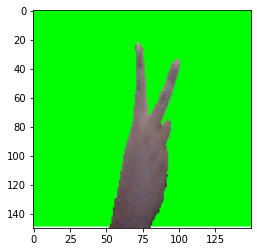

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')